# Plot data from organism and wound csv files

Import modules:

In [1]:
import skimage
import napari
from tifffile import imread
from pathlib import Path

import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from skimage.draw import ellipse
from skimage.measure import label, regionprops, regionprops_table
from skimage.transform import rotate

# Just load seaborn & set theme and the chart looks better:
import seaborn as sns
sns.set_context('notebook')
import os

Insert the pixel size in microns: (depending the microscope objective)  
Insert the timepoint slice where the laser ablation occurs:

In [2]:
size_pixel=0.7692 #in microns
laser_timepoint = 19

Insert the sample csv filename and the corresponding wound csv filename:

In [3]:
file_table_organism='../data/results/otsu/features_otsu_contrast.csv'
#file_table_wound = '../data/features_wound_chanvese_contrast.csv'


figures_folder = '../data/results/figures/otsu/contrast/'

# Create the folder if not existant

if os.path.isdir(figures_folder) != True:
    os.mkdir(figures_folder)


In [4]:
# import the tables
ppties = pd.read_csv(file_table_organism,sep=';')
#ppties_wound = pd.read_csv(file_table_wound,sep=';')

In [5]:
print("Here are the available metrics :",list(ppties.columns))

Here are the available metrics : ['label', 'centroid-0', 'centroid-1', 'area', 'perimeter', 'eccentricity', 'orientation', 'axis_major_length', 'axis_minor_length', 'convexity']


## This is an example of plots that can be generated with the shape descriptors analysis

Plot organism area overtime

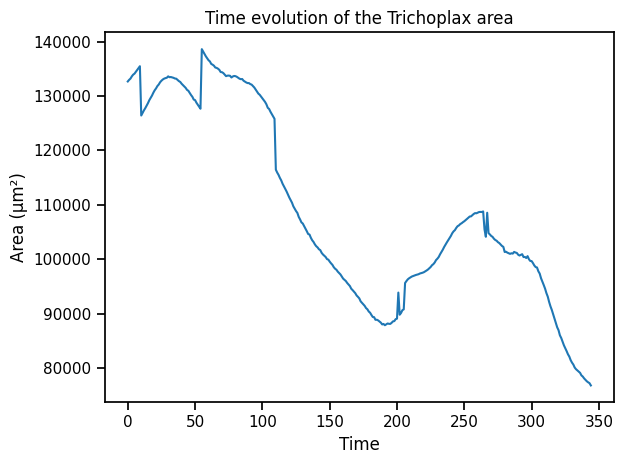

In [7]:
sns.lineplot(ppties.area*(size_pixel)*(size_pixel))
plt.ylabel('Area (µm²)')
plt.xlabel('Time')
plt.title('Time evolution of the Trichoplax area')
name = figures_folder + "trichoplax_area_time.png"
plt.tight_layout()
plt.savefig(name, dpi=300)

Plot organism perimeter. Can be used as a proxy of retraction.

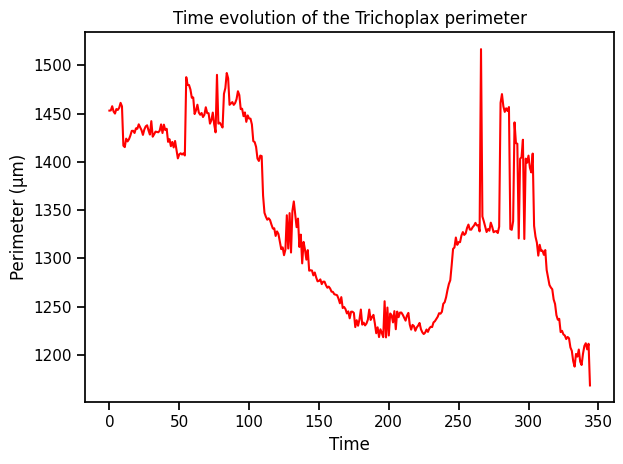

In [8]:
plt.plot(ppties.perimeter*size_pixel, 'r')
plt.ylabel('Perimeter (µm)')
plt.xlabel('Time')
plt.title('Time evolution of the Trichoplax perimeter')
name = figures_folder + "trichoplax_perimeter_time.png"
plt.tight_layout()
plt.savefig(name, dpi=300)

**Plot Eccentricity of the organism shape**  
The eccentricity is the ratio of the distance between the foci of the ellipse and its major axis length. The value is between 0 and 1. (0 and 1 are degenerate cases. An ellipse whose eccentricity is 0 is actually a circle, while an ellipse whose eccentricity is 1 is a line segment.)

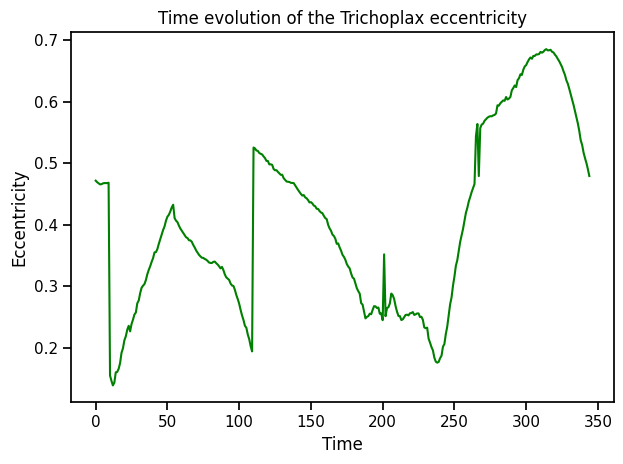

In [9]:
plt.plot(ppties.eccentricity, 'g')
plt.ylabel('Eccentricity')
plt.xlabel('Time')
plt.title('Time evolution of the Trichoplax eccentricity')
name = figures_folder + "trichoplax_eccentricity_time.png"
plt.tight_layout()
plt.savefig(name, dpi=300)

**Plot convexity of the organism**  
Below 1, it indicates how much the shape has concaved regions.

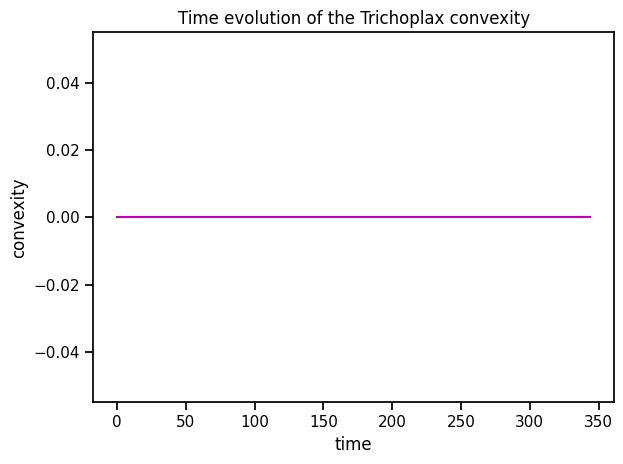

In [10]:
# PLOT CONVEXITY ORGANISM
plt.plot(ppties.convexity, 'm')
plt.ylabel('convexity')
plt.xlabel('time')
plt.title('Time evolution of the Trichoplax convexity')
name = figures_folder + "trichoplax_convexity_time.png"
plt.tight_layout()
plt.savefig(name, dpi=300)

## Plot trajectories

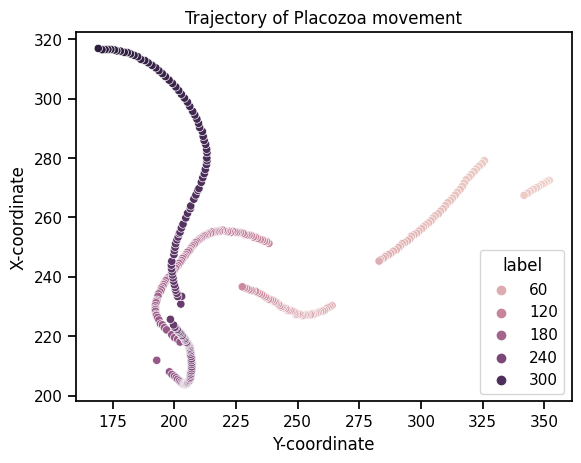

In [11]:
sns.scatterplot(x = ppties['centroid-0'],y = ppties['centroid-1'],marker="o"
                ,hue=ppties.label)
plt.xlabel('Y-coordinate')
plt.ylabel('X-coordinate')
plt.title('Trajectory of Placozoa movement')
plt.show()

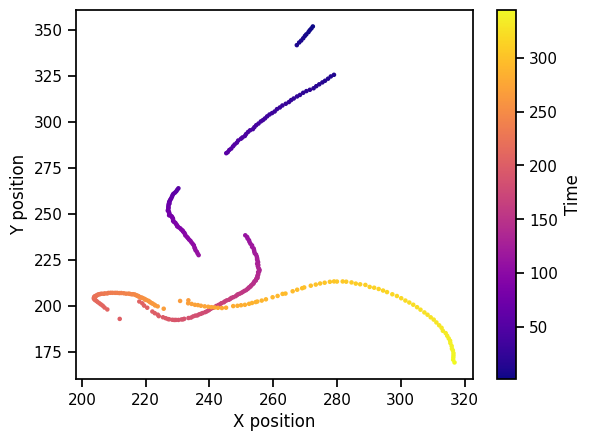

In [12]:
p = ppties.plot.scatter(x = 'centroid-1',y = 'centroid-0',
                    color='label',marker='.',colormap='plasma')
plt.xlabel('X position')
plt.ylabel('Y position')
f = plt.gcf()
cax = f.get_axes()[1]
cax.set_ylabel('Time')
plt.savefig(figures_folder+'trajectory.png',dpi=300)
plt.show()


### Compute MSD

In [67]:
 import numpy as np

#global MSD

xdata = ppties['centroid-1'].values
ydata = ppties['centroid-0'].values

r = np.sqrt(xdata**2 + ydata**2)
diff = np.diff(r) #this calculates r(t + dt) - r(t)
diff_sq = diff**2
MSD = np.mean(diff_sq)

MSD 

528.6969562765685

In [13]:
# per time point MSD

xdata = ppties['centroid-1'].values
ydata = ppties['centroid-0'].values
MSD = []
for i in range(len(xdata)):
    MSD.append((np.sqrt(((xdata[i]-xdata[0])*size_pixel)**2+((ydata[i]-ydata[0]))*size_pixel**2)))
    
MSD

[0.0,
 0.7067831949369897,
 1.3506162947847462,
 1.996865566631246,
 2.8114628019425822,
 3.3959124272270405,
 4.196496706159744,
 5.018655564205677,
 5.749463105368514,
 6.707567375838121,
 16.05038811819006,
 16.428487265685746,
 17.041030877073037,
 17.62208110533792,
 18.09402933001155,
 18.656583743064278,
 19.234189080436842,
 19.89371739185526,
 20.3919588101909,
 20.841195978405295,
 21.420529307500075,
 22.167042492304603,
 22.720614839606675,
 23.450885323279753,
 24.0373898789315,
 24.731812619875846,
 25.382220766957268,
 26.05455021222045,
 26.784133088250247,
 27.427901600868005,
 28.271364006149756,
 28.887213820610352,
 29.454895681902386,
 30.147127617827362,
 30.89395841489041,
 31.51490349594955,
 32.04477457381286,
 32.824854280347076,
 33.474926349142535,
 34.18196872592919,
 34.872333373994444,
 35.38917616459582,
 36.036884376068876,
 36.79919929302735,
 37.42668121674092,
 38.01894072114955,
 38.51650379417797,
 39.2247024028798,
 39.977389454338855,
 40.6608604

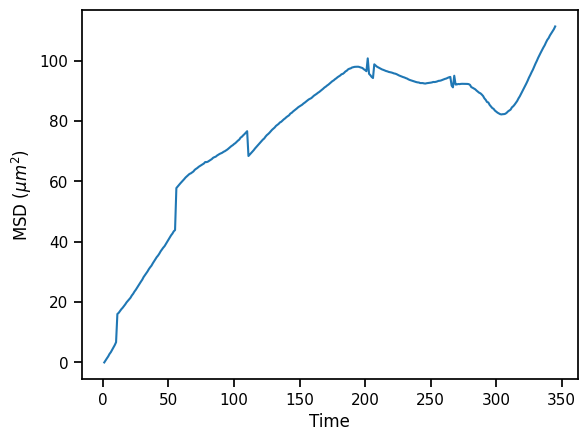

In [14]:
sns.lineplot(x = ppties.label,y = MSD)
plt.ylabel('MSD ($µm^2$)')
plt.xlabel('Time')
plt.savefig(figures_folder+'MSD.png',dpi=300)
plt.show()

Plot exactly the same plots but for the wound shape of the same sample.  

**Plot wound area:**

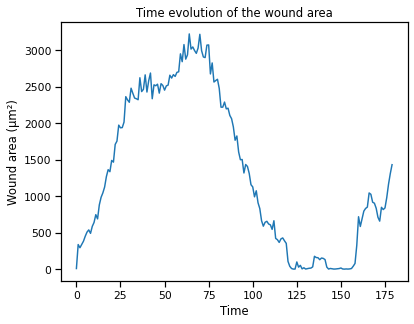

In [93]:
plt.plot(ppties_wound.area*(size_pixel)*(size_pixel))
plt.ylabel('Wound area (µm²)')
plt.xlabel('Time')
plt.title('Time evolution of the wound area')
name = figures_folder + "wound_area_time.png"
plt.savefig(name, dpi=300)

**Plot trichoplax and its wound areas overtime:**

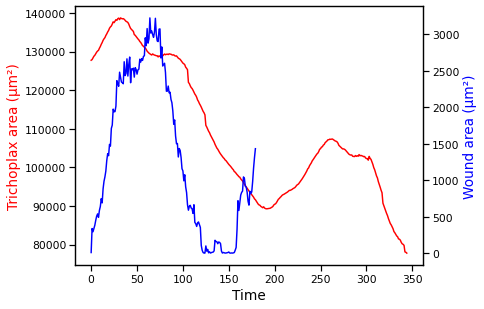

In [94]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(ppties.area*(size_pixel)*(size_pixel),
        color="red")

#ax.axvline(laser_timepoint, linestyle ='dashed', color = 'black', label='laser ablation')
#ax.legend(bbox_to_anchor = (1.0, 1))

# set x-axis label
ax.set_xlabel("Time", fontsize = 14)
# set y-axis label
ax.set_ylabel("Trichoplax area (µm²)",
              color="red",
              fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(ppties_wound.area*(size_pixel)*(size_pixel),color="blue")
ax2.set_ylabel("Wound area (µm²)",color="blue",fontsize=14)
plt.show()

name = figures_folder + "both_areas_time.png"
fig.savefig(name, dpi=300, bbox_inches='tight')

*Interpretation of the graph above*

The wound retraction (shown by wound area decrease) is always preceded by an entire organism retraction (organism area decrease) !

**Plot wound perimeter overtime**

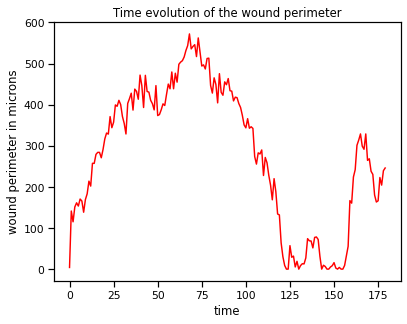

In [95]:
#PLOT PERIMETER WOUND
plt.plot(ppties_wound.perimeter*size_pixel,'r')
plt.ylabel('wound perimeter in microns')
plt.xlabel('time')
plt.title('Time evolution of the wound perimeter')

name = figures_folder + "wound_perimeter_time.png"
plt.savefig(name, dpi=300)

**Plot wound eccentricity**

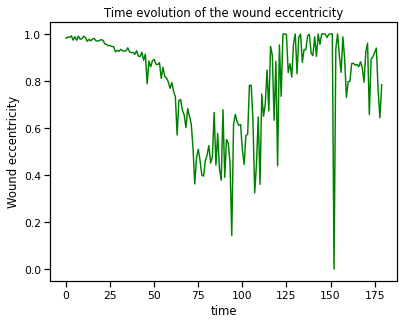

In [96]:
plt.plot(ppties_wound.eccentricity, 'g')
plt.ylabel('Wound eccentricity')
plt.xlabel('time')
plt.title('Time evolution of the wound eccentricity')

name = figures_folder + "wound_eccentricity_time.png"
plt.savefig(name, dpi=300)

**Plot wound convexity**

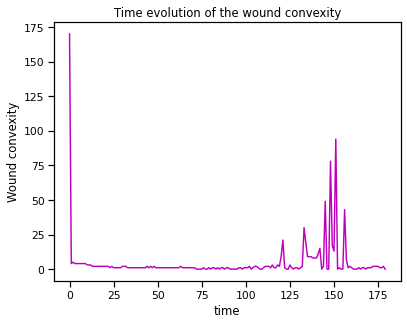

In [97]:
# PLOT CONVEXITY wound
plt.plot(ppties_wound.convexity, 'm')
plt.ylabel('Wound convexity')
plt.xlabel('time')
plt.title('Time evolution of the wound convexity')
name = figures_folder + "wound_convexity_time.png"
plt.savefig(name, dpi=300)

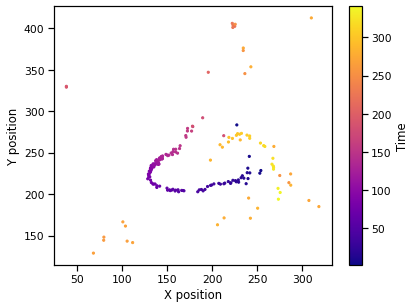

In [98]:
ppties_wound.plot.scatter(x = 'centroid-1',y = 'centroid-0',
                    color='label',marker='.',colormap='plasma')
plt.xlabel('X position')
plt.ylabel('Y position')
f = plt.gcf()
cax = f.get_axes()[1]
cax.set_ylabel('Time')
plt.savefig(figures_folder+'trajectory_wound.png',dpi=300)
plt.show()

The plot above should be confined as the wound is more or less at the same postion: could be used as a control

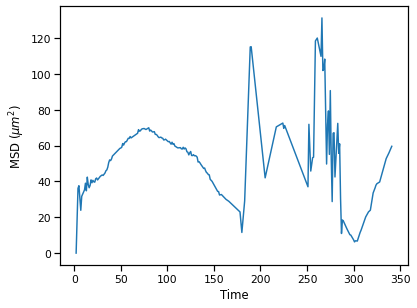

In [100]:
xdata_w = ppties_wound['centroid-1'].values
ydata_w = ppties_wound['centroid-0'].values
MSD_w = []
for i in range(len(xdata_w)):
    MSD_w.append((np.sqrt((xdata_w[i]-xdata_w[0])**2+(ydata_w[i]-ydata_w[0])**2))*size_pixel*size_pixel)
    
sns.lineplot(x = ppties_wound.label,y = MSD_w)
plt.ylabel('MSD ($µm^2$)')
plt.xlabel('Time')
plt.savefig(figures_folder+'MSD_wound.png',dpi=300)
plt.show()

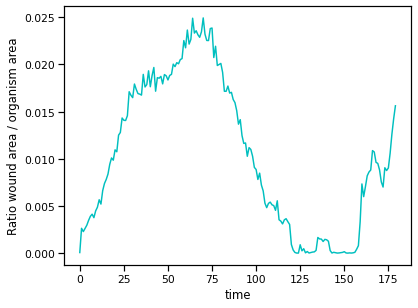

In [101]:
#ratio areas wound and organism
plt.plot(ppties_wound.area/ppties.area, 'c')
plt.ylabel('Ratio wound area / organism area')
plt.xlabel('time')
name = figures_folder + "trichoplax_wound_ratio_areas_time.png"
plt.savefig(name, dpi=300)

**Look at whether the organism and the wound major axis are oriented into the same direction:**

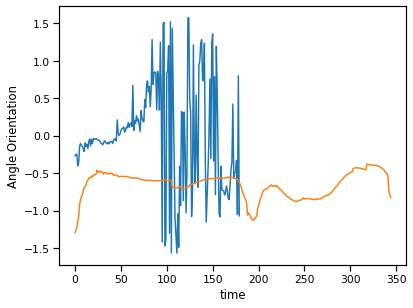

In [102]:
plt.plot(ppties_wound.orientation, label = 'wound')
plt.plot(ppties.orientation, label = 'organism')
plt.ylabel('Angle Orientation')
plt.xlabel('time')

#plt.axvline(laser_timepoint, linestyle ='dashed', color = 'black', label='laser ablation')
#plt.legend(bbox_to_anchor = (1.0, 1))

name = figures_folder + "compare_orientation_time.png"
plt.savefig(name, dpi=300,bbox_inches='tight')

**Compare the patterns of the organism and the wound convexities:**

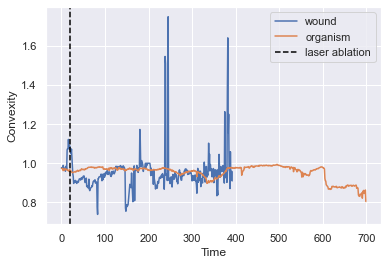

In [59]:
plt.plot(ppties_wound.convexity, label = 'wound')
plt.plot(ppties.convexity, label = 'organism')
plt.ylabel('Convexity')
plt.xlabel('Time')
plt.axvline(laser_timepoint, linestyle ='dashed', color = 'black', label='laser ablation')
plt.legend(bbox_to_anchor = (1.0, 1))
name = figures_folder + "compare_convexities.png"
plt.savefig(name, dpi=300)

# Make a gif with move and area at the same time

Good
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
2

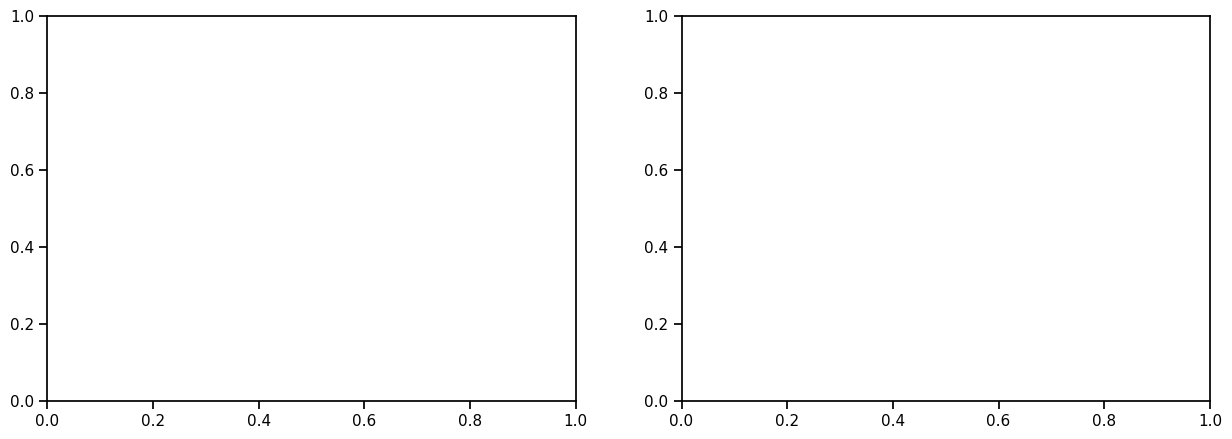

In [86]:
import tifffile
import imageio.v3 as iio

im = tifffile.imread('../data/tricho_8_contrast.tif')
area = ppties.area*(size_pixel)*(size_pixel)

if np.shape(area)[0] == (np.shape(im)[0])-1:
    print('Good')
    
#create axis to plot 

fig,ax = plt.subplots(1,2)
fig.set_size_inches(15,5)

path = '../data/results/figures/gif/'
       
# loop over all frames and create a plot with the corresponding area and show the corresponding image

with imageio.get_writer(path+'mygif_compressed.gif', mode='I') as writer:

    for i in range(np.shape(area)[0]):
        print(i)
        fig,ax = plt.subplots(1,2)
        fig.set_size_inches(15,5)
        plt.rcParams['figure.dpi'] = 70
        ax[0].plot(area.values[0:i],color='black')
        ax[0].set_ylabel('Area ($µm^2$)')
        ax[0].set_xlim(0,np.shape(area)[0])
        ax[0].set_ylim(np.min(area)-10,np.max(area)+10)
        ax[0].set_xlabel('Time')

        ax[1].imshow(im[i,:,:],origin='lower')
        ax[1].axis("off")

        fig.suptitle(f'Time point {i}')

        plt.tight_layout()
        
        plt.savefig('../data/results/figures/gif/frame_'+str(i)+'.png')
        plt.close()
        image = iio.imread('../data/results/figures/gif/frame_'+str(i)+'.png')
        writer.append_data(image)
        os.remove('../data/results/figures/gif/frame_'+str(i)+'.png')
        
    print('Done plotting!')